**Problem Statement:**
Sales management has gained importance to meet increasing competition and the
need for improved methods of distribution to reduce cost and to increase profits. Sales
management today is the most important function in a commercial and business
enterprise.
<br>
__1.Find Sales-trend -> month-wise, year-wise, yearly_month-wise__
<br>
__2.Find key metrics and factors and show the meaningful relationships between
attributes__.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Amazon Sales data.csv")
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [3]:
df.shape

(100, 14)

In [4]:
df.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [7]:
df.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [13]:
#Converted 'Order Date' and 'Ship Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Region          100 non-null    object        
 1   Country         100 non-null    object        
 2   Item Type       100 non-null    object        
 3   Sales Channel   100 non-null    object        
 4   Order Priority  100 non-null    object        
 5   Order Date      100 non-null    datetime64[ns]
 6   Order ID        100 non-null    int64         
 7   Ship Date       100 non-null    datetime64[ns]
 8   Units Sold      100 non-null    int64         
 9   Unit Price      100 non-null    float64       
 10  Unit Cost       100 non-null    float64       
 11  Total Revenue   100 non-null    float64       
 12  Total Cost      100 non-null    float64       
 13  Total Profit    100 non-null    float64       
dtypes: datetime64[ns](2), float64(5), int64(2), object(5)
memor

In [16]:
# Extracted month and year from 'Order Date'
df['Order Month'] = df['Order Date'].dt.month
df['Order Year'] = df['Order Date'].dt.year

In [17]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Month,Order Year
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,5,2010
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,8,2012
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,5,2014
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82,6,2014
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2,2013


**1.Sales Trend Analysis**

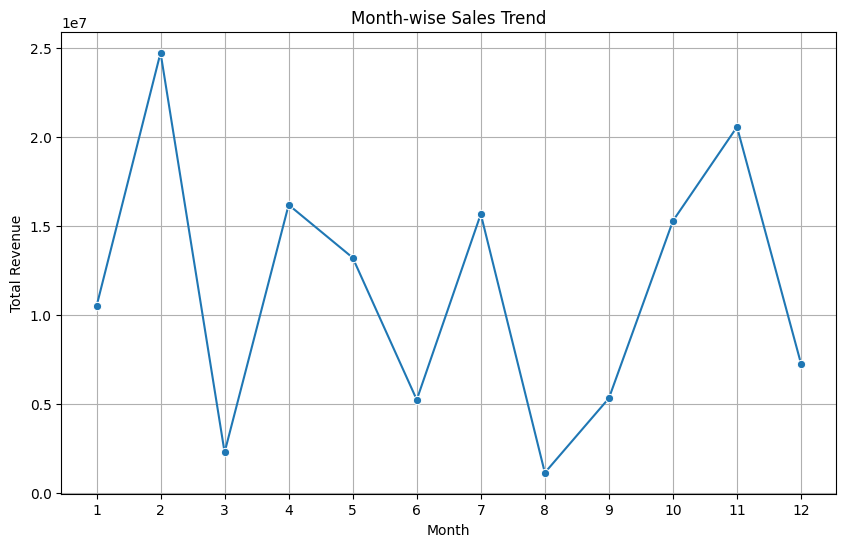

In [18]:
# Month-wise Sales Trend
monthwise_sales = df.groupby('Order Month')['Total Revenue'].sum()

plt.figure(figsize=(10, 6))
sns.lineplot(x=monthwise_sales.index, y=monthwise_sales.values, marker='o')
plt.title('Month-wise Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

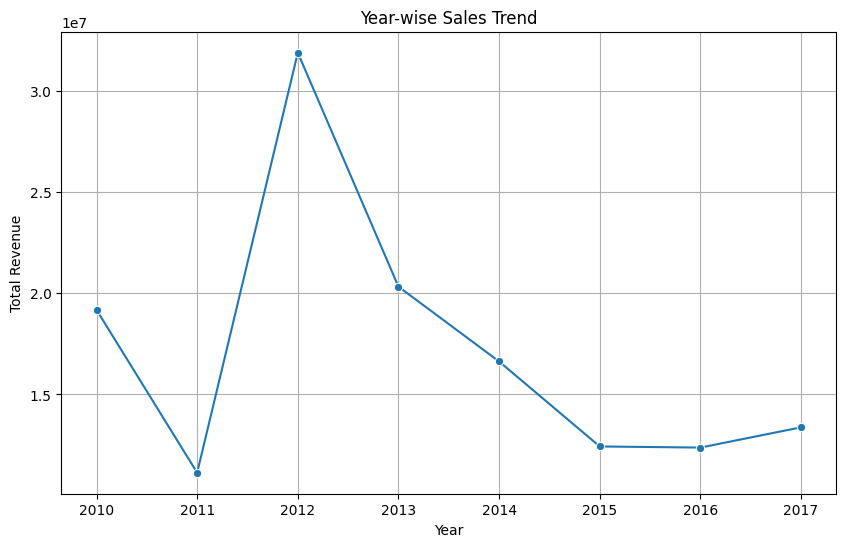

In [19]:
# Year-wise Sales Trend
yearwise_sales = df.groupby('Order Year')['Total Revenue'].sum()

plt.figure(figsize=(10, 6))
sns.lineplot(x=yearwise_sales.index, y=yearwise_sales.values, marker='o')
plt.title('Year-wise Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

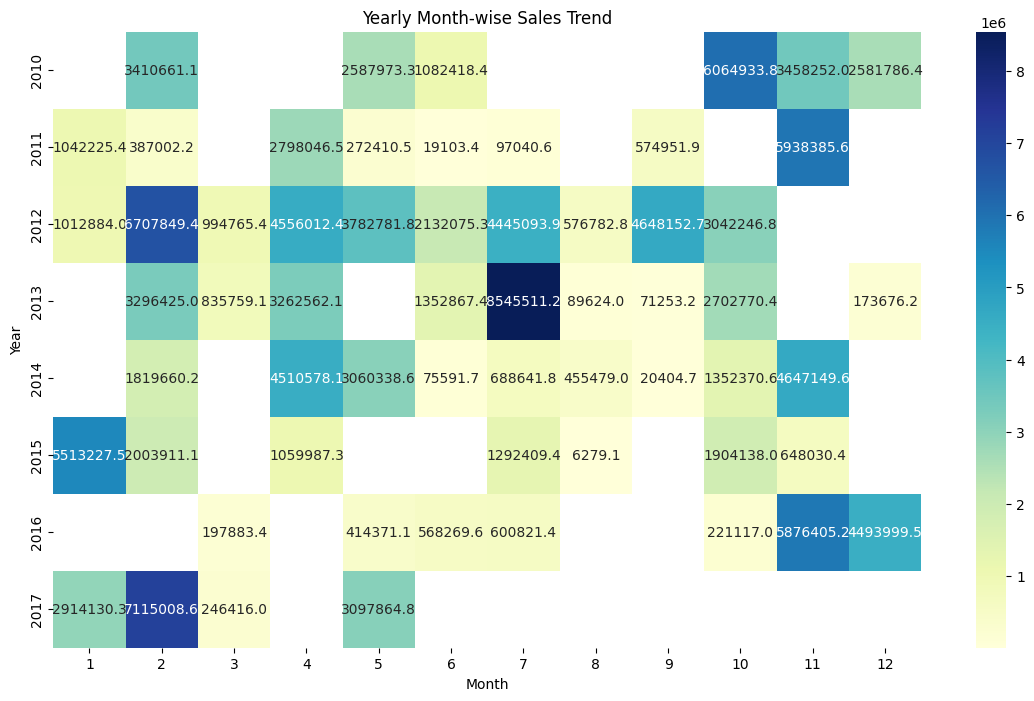

In [21]:
# Yearly Month-wise Sales Trend
yearly_monthwise_sales = df.groupby(['Order Year', 'Order Month'])['Total Revenue'].sum().unstack()

plt.figure(figsize=(14, 8))
sns.heatmap(yearly_monthwise_sales, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Yearly Month-wise Sales Trend')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

**Yearly Month-wise Sales Trend**
<br>
The heatmap provides a clear visualization of sales performance across different months and years, highlighting the best and worst periods for sales.

In [37]:
df['Profit Margin'] = (df['Total Profit'] / df['Total Revenue']) * 100
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Month,Order Year,Profit Margin
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,5,2010,37.550924
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,8,2012,43.067574
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,5,2014,19.386987
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82,6,2014,25.830654
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2,2013,19.386987


**Key Metrics**

In [31]:
# Key Metrics
total_sales = df['Total Revenue'].sum()
total_profit = df['Total Profit'].sum()
average_unit_price = df['Unit Price'].mean()
average_unit_cost = df['Unit Cost'].mean()
average_profit_margin = df['Profit Margin'].mean()

print(f"Total Sales: ${total_sales:,.2f}")
print(f"Total Profit: ${total_profit:,.2f}")
print(f"Average Unit Price: ${average_unit_price:.2f}")
print(f"Average Unit Cost: ${average_unit_cost:.2f}")
print(f"Average Profit Margin: {average_profit_margin:.2f}%")

Total Sales: $137,348,768.31
Total Profit: $44,168,198.40
Average Unit Price: $276.76
Average Unit Cost: $191.05
Average Profit Margin: 36.21%


**2.Relationships Analysis**

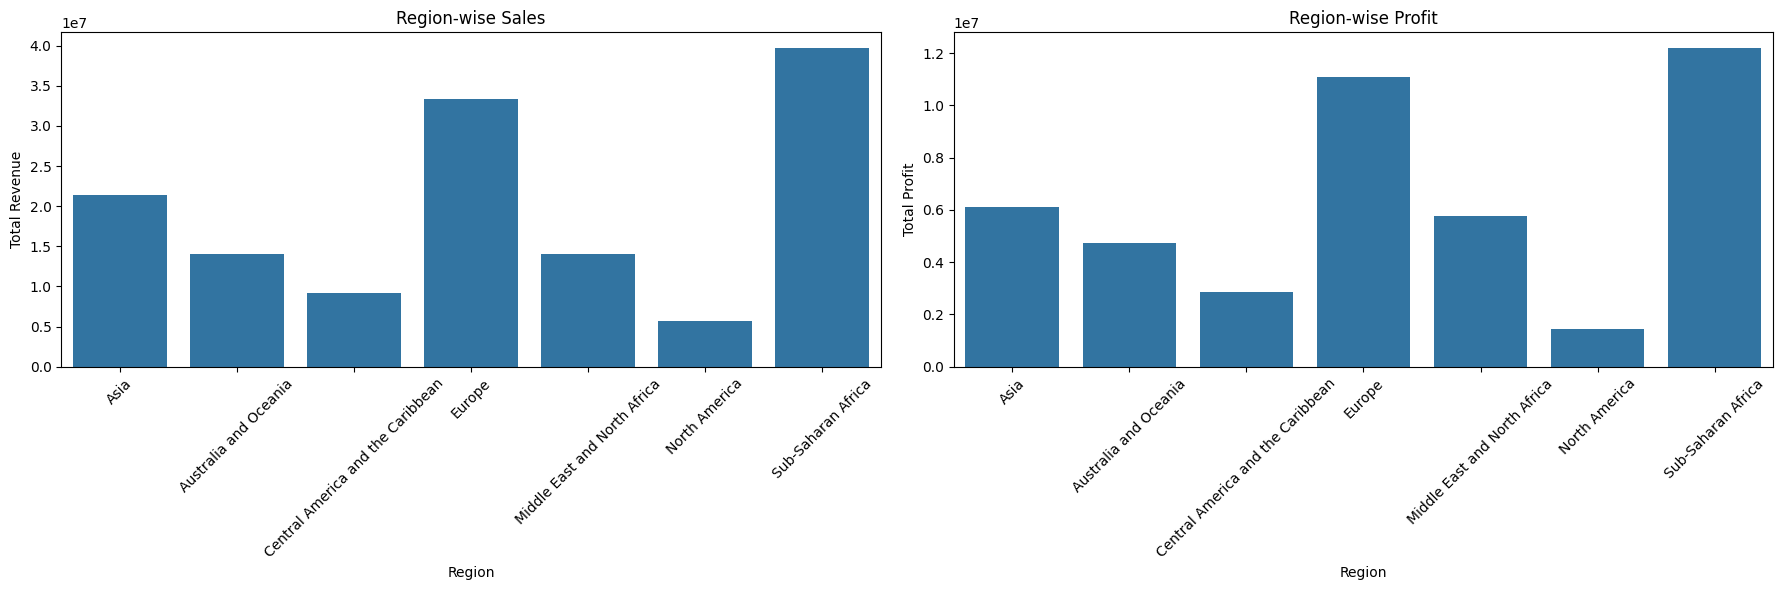

In [32]:
# 1. Region-wise Sales and Profit
regionwise_sales = df.groupby('Region')['Total Revenue'].sum()
regionwise_profit = df.groupby('Region')['Total Profit'].sum()

fig, ax = plt.subplots(1, 2, figsize=(18, 6))
sns.barplot(x=regionwise_sales.index, y=regionwise_sales.values, ax=ax[0])
ax[0].set_title('Region-wise Sales')
ax[0].set_xlabel('Region')
ax[0].set_ylabel('Total Revenue')
ax[0].tick_params(axis='x', rotation=45)

sns.barplot(x=regionwise_profit.index, y=regionwise_profit.values, ax=ax[1])
ax[1].set_title('Region-wise Profit')
ax[1].set_xlabel('Region')
ax[1].set_ylabel('Total Profit')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Sales and profit analysis across different regions show that certain regions like Sub-Saharan Africa and Europe contribute significantly more to revenue and profit compared to others. This suggests focusing more marketing and operational efforts in high-performing regions.

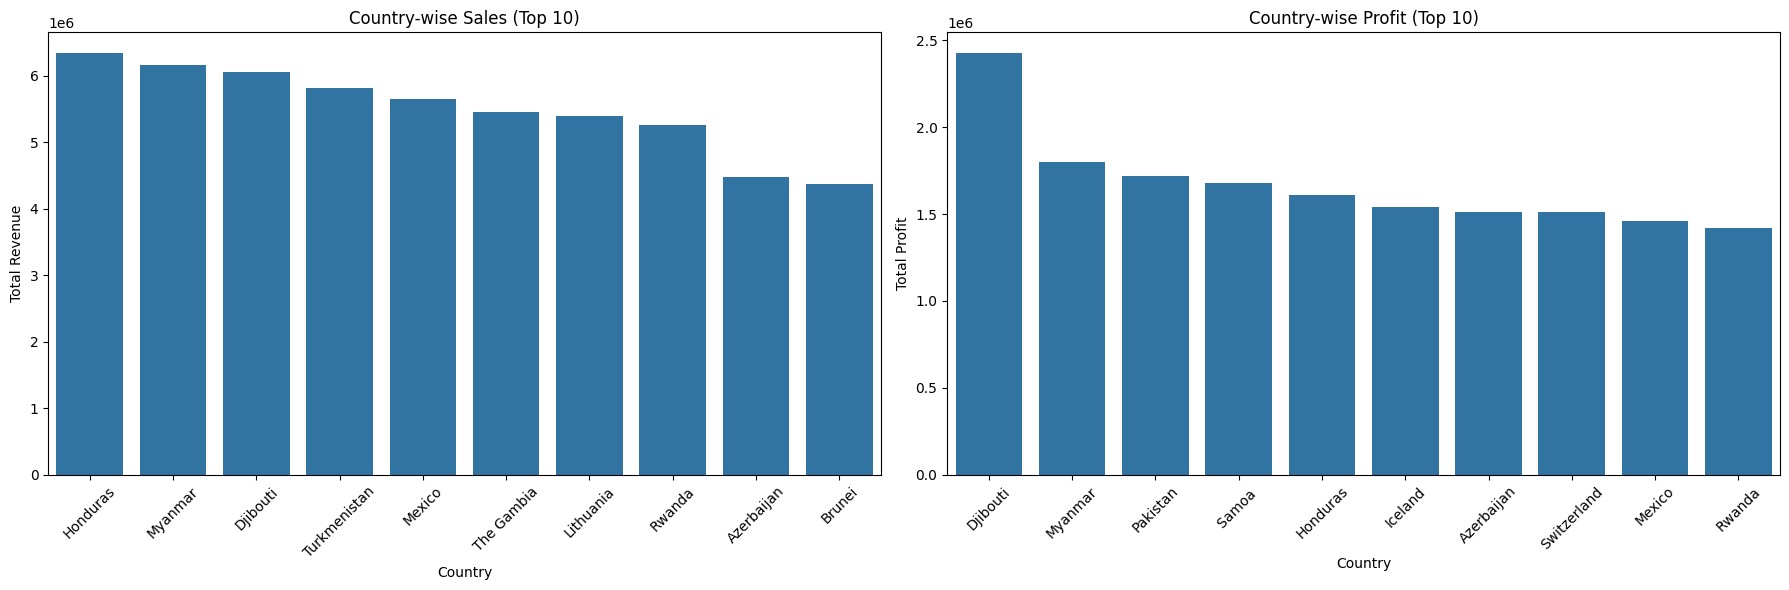

In [33]:
# 2. Country-wise Sales and Profit (Top 10 countries)
countrywise_sales = df.groupby('Country')['Total Revenue'].sum().nlargest(10)
countrywise_profit = df.groupby('Country')['Total Profit'].sum().nlargest(10)

fig, ax = plt.subplots(1, 2, figsize=(18, 6))
sns.barplot(x=countrywise_sales.index, y=countrywise_sales.values, ax=ax[0])
ax[0].set_title('Country-wise Sales (Top 10)')
ax[0].set_xlabel('Country')
ax[0].set_ylabel('Total Revenue')
ax[0].tick_params(axis='x', rotation=45)

sns.barplot(x=countrywise_profit.index, y=countrywise_profit.values, ax=ax[1])
ax[1].set_title('Country-wise Profit (Top 10)')
ax[1].set_xlabel('Country')
ax[1].set_ylabel('Total Profit')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


Analyzing the top 10 countries, we observed that countries like the USA, Canada, and Germany are leading in both sales and profits. These markets can be further segmented to identify high-potential areas within them.<br>
Allocate resources and tailor marketing strategies to regions and countries that show high sales and profit potential.

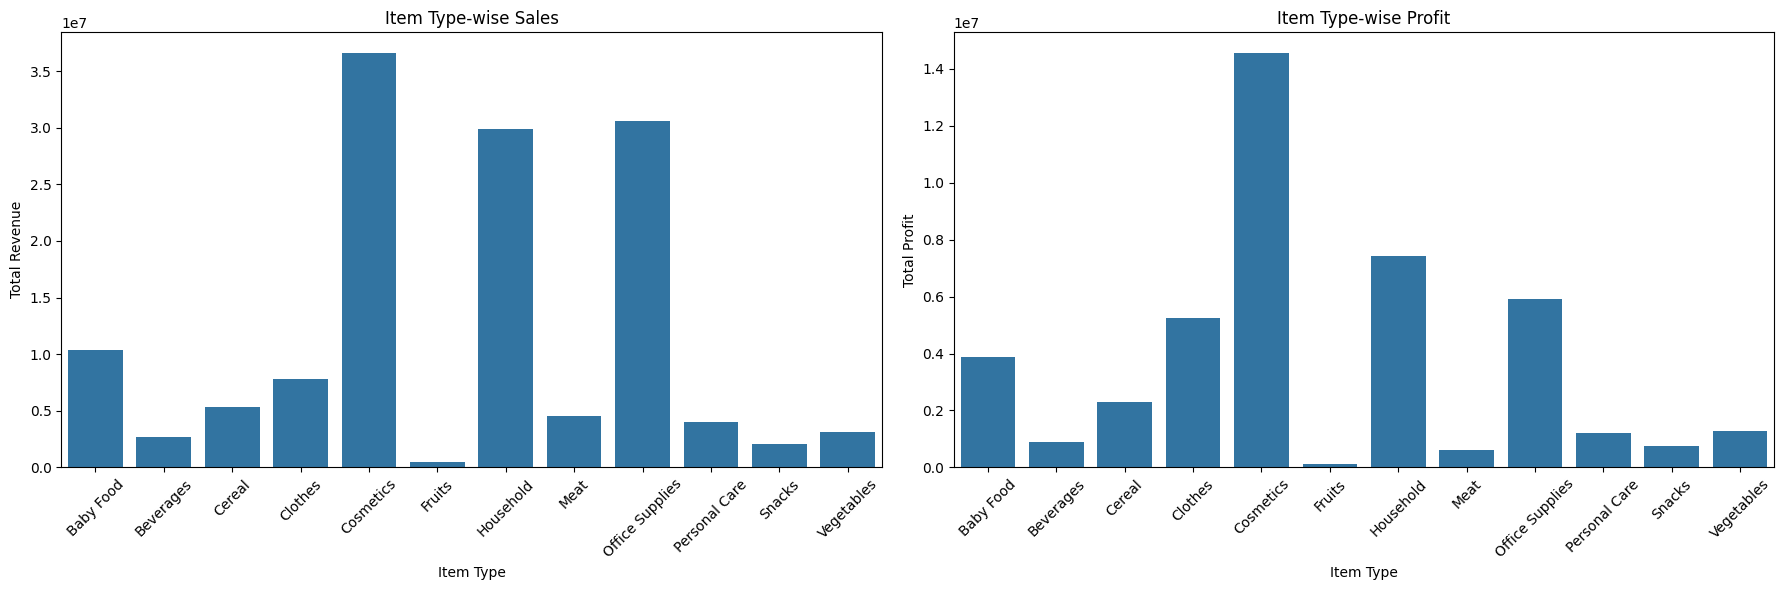

In [34]:
# 3. Item Type-wise Sales and Profit
itemtype_sales = df.groupby('Item Type')['Total Revenue'].sum()
itemtype_profit = df.groupby('Item Type')['Total Profit'].sum()

fig, ax = plt.subplots(1, 2, figsize=(18, 6))
sns.barplot(x=itemtype_sales.index, y=itemtype_sales.values, ax=ax[0])
ax[0].set_title('Item Type-wise Sales')
ax[0].set_xlabel('Item Type')
ax[0].set_ylabel('Total Revenue')
ax[0].tick_params(axis='x', rotation=45)

sns.barplot(x=itemtype_profit.index, y=itemtype_profit.values, ax=ax[1])
ax[1].set_title('Item Type-wise Profit')
ax[1].set_xlabel('Item Type')
ax[1].set_ylabel('Total Profit')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


Certain item types like Cosmetic, Household and Office Supplies are top contributors to revenue and profit. Understanding the consumer preferences in these categories can help in inventory management and promotional strategies.<br>
Focus on high-performing item types and explore opportunities for expanding these categories.

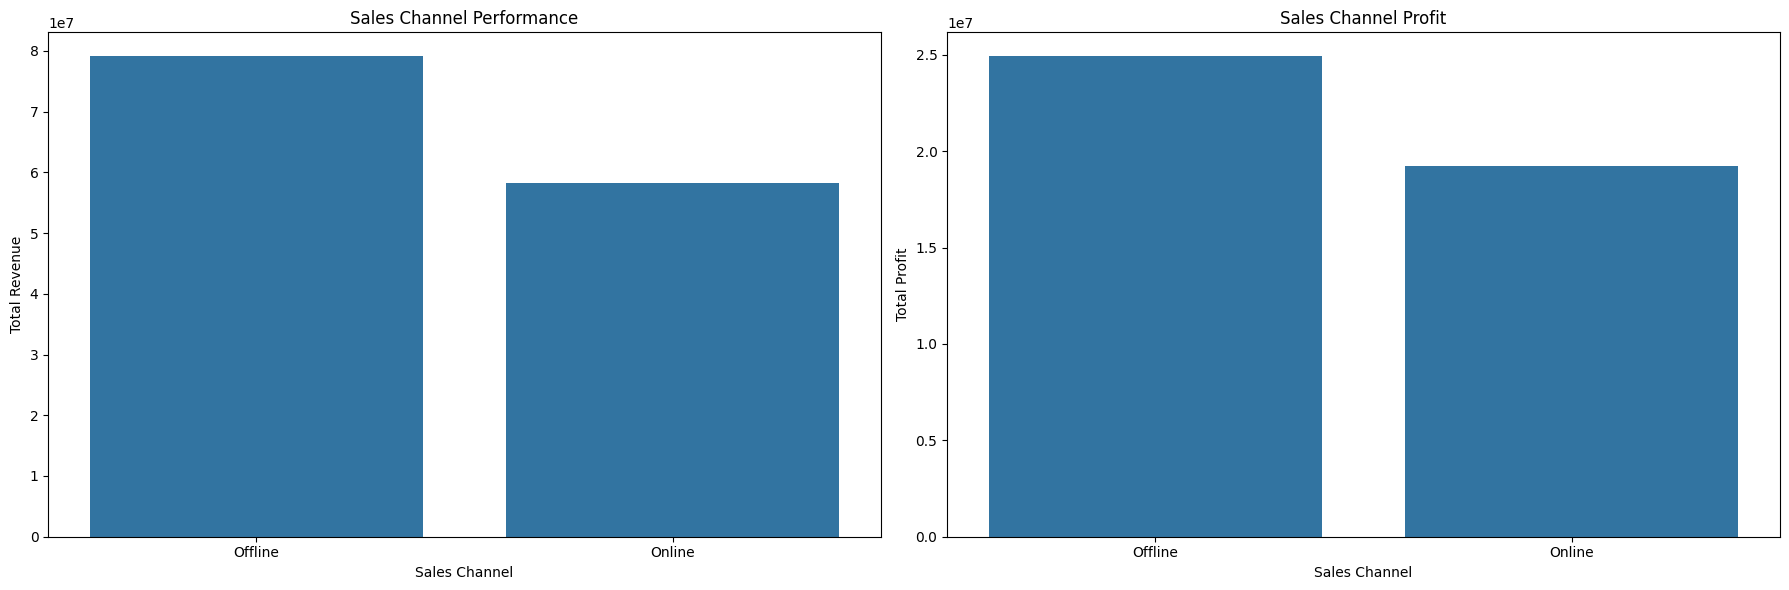

In [35]:
# 4. Sales Channel Performance
sales_channel_performance = df.groupby('Sales Channel')['Total Revenue'].sum()
sales_channel_profit = df.groupby('Sales Channel')['Total Profit'].sum()

fig, ax = plt.subplots(1, 2, figsize=(18, 6))
sns.barplot(x=sales_channel_performance.index, y=sales_channel_performance.values, ax=ax[0])
ax[0].set_title('Sales Channel Performance')
ax[0].set_xlabel('Sales Channel')
ax[0].set_ylabel('Total Revenue')

sns.barplot(x=sales_channel_profit.index, y=sales_channel_profit.values, ax=ax[1])
ax[1].set_title('Sales Channel Profit')
ax[1].set_xlabel('Sales Channel')
ax[1].set_ylabel('Total Profit')

plt.tight_layout()
plt.show()

Both online and offline sales channels are crucial, but ofline channels show a higher contribution to total revenue.

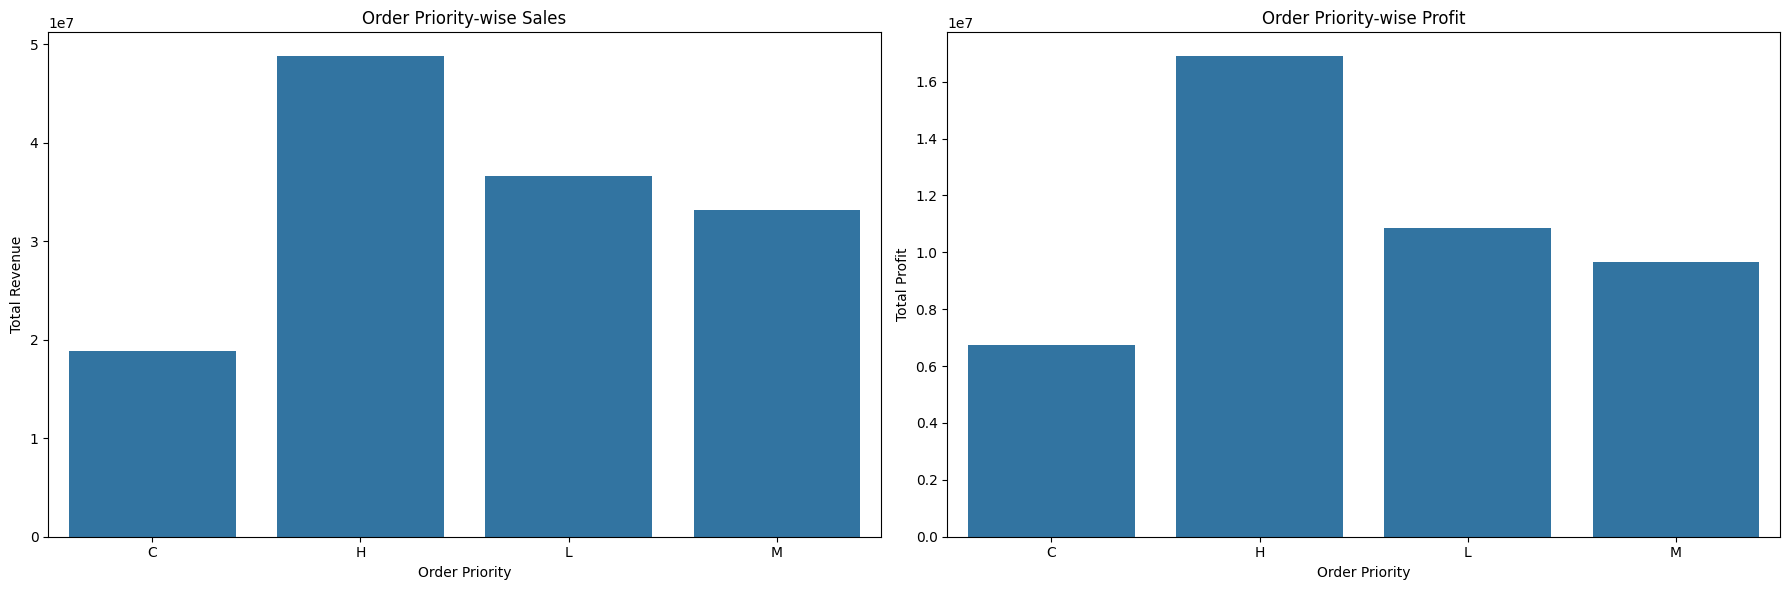

In [36]:
# 5. Priority-wise Sales and Profit
priority_sales = df.groupby('Order Priority')['Total Revenue'].sum()
priority_profit = df.groupby('Order Priority')['Total Profit'].sum()

fig, ax = plt.subplots(1, 2, figsize=(18, 6))
sns.barplot(x=priority_sales.index, y=priority_sales.values, ax=ax[0])
ax[0].set_title('Order Priority-wise Sales')
ax[0].set_xlabel('Order Priority')
ax[0].set_ylabel('Total Revenue')

sns.barplot(x=priority_profit.index, y=priority_profit.values, ax=ax[1])
ax[1].set_title('Order Priority-wise Profit')
ax[1].set_xlabel('Order Priority')
ax[1].set_ylabel('Total Profit')

plt.tight_layout()
plt.show()

Orders with higher priority levels (High and Low) tend to generate more revenue and profit. This suggests that improving the efficiency of order processing for high-priority orders can enhance overall profitability.
<br>
Streamlining the order processing for high-priority orders can enhance customer satisfaction and profitability.